**Fruit Freshness Classification Project**

**Author:** Akshay Bhujbal
**Project Type:** AI / Deep Learning Portfolio Project

**Project Overview**

This project demonstrates a **Convolutional Neural Network (CNN)** model to classify fruits as **Fresh** or **Rotten**.
The current model works for **3 types of fruits**:

🍎 Apple
🍌 Banana
🍊 Orange

The app/pipeline allows users to:

1. Upload images of fruits for classification.
2. Predict whether the fruit is Fresh or Rotten.
3. Explore model performance metrics and predictions on sample images.

The dataset consists of labeled images of fruits in varying conditions. The CNN model is trained to extract visual features and perform accurate classification.

**Main Objectives**

* Build and train a deep learning model for image classification.
* Demonstrate a complete ML pipeline: data loading, preprocessing, model building, training, evaluation, and deployment.
* Apply AI in real-world use cases such as:

  * Food quality control
  * Reducing food waste
  * Smart grocery systems

**Project Pipeline**

1. **Import Libraries** → TensorFlow, Keras, NumPy, Matplotlib, etc.
2. **Load Dataset** → Load images from Kaggle/local directory.
3. **Preprocess Images** → Resize, normalize, and augment images.
4. **Build CNN Model** → Stack Conv2D, MaxPooling2D, Flatten, Dense layers.
5. **Train and Evaluate** → Train with training set, evaluate on validation set.
6. **Save & Reload Model** → Save model weights, reload for inference.
7. **Predict on New Images** → Test with new fruit images.
8. **Frontend Integration** → Deploy using Gradio for easy image uploads and predictions.


# Import Required Libraries

- **tensorflow** → build deep learning models  
- **Sequential** → stack layers one by one  
- **Conv2D & MaxPooling2D** → extract features from images  
- **Flatten & Dense** → classification layers  
- **ImageDataGenerator** → load & preprocess images  
- **matplotlib & numpy** → visualization and array handling


In [1]:
import kagglehub  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import gradio as gr

# Download Dataset from Kaggle

We’ll use the dataset **[Fresh and Rotten Fruits](https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)**.  

It contains images in **train/test folders**, each with subfolders:  

- freshapples  
- rottenapples  
- freshbanana  
- rottenbanana  
- freshoranges  
- rottenoranges  


In [6]:
# Change this to your local dataset path

base_dir = r"C:\Users\Lenovo\OneDrive\Desktop\Fresh_Rotten_Fruit_Classifier\dataset"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

print("Train Directory:", train_dir)
print("Test Directory:", test_dir)


Train Directory: C:\Users\Lenovo\OneDrive\Desktop\Fresh_Rotten_Fruit_Classifier\dataset\train
Test Directory: C:\Users\Lenovo\OneDrive\Desktop\Fresh_Rotten_Fruit_Classifier\dataset\test


# Data Preprocessing

We need to prepare images before training:

- **Resize** all images to the same size (150x150).  
- **Rescale** pixel values from `[0,255]` → `[0,1]`.  
- **Augmentation** for training (rotation, zoom, flip) → makes the model more robust.  
- **Validation data** only rescaled (no augmentation).


In [7]:
img_size = (150, 150)   
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


#  Building the CNN Model

## Model Architecture

- **Conv2D** → extracts features (shapes, textures, colors).  
- **MaxPooling2D** → reduces image size but keeps important info.  
- **Flatten** → converts 2D → 1D vector.  
- **Dense layers** → final decision making.  
- **Softmax activation** → outputs probability for each of the 6 classes.  


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

- Use **training data** for learning.  
- Use **validation data** for checking performance.  
- Train for **10 epochs**.  


In [9]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1238s 4s/step - accuracy: 0.5457 - loss: 1.1486 - val_accuracy: 0.8310 - val_loss: 0.5222
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 912s 3s/step - accuracy: 0.7802 - loss: 0.6346 - val_accuracy: 0.8358 - val_loss: 0.4616
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 933s 3s/step - accuracy: 0.8285 - loss: 0.5053 - val_accuracy: 0.8870 - val_loss: 0.3248
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 667s 2s/step - accuracy: 0.8429 - loss: 0.4528 - val_accuracy: 0.8955 - val_loss: 0.2842
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.8637 - loss: 0.4000 - val_accuracy: 0.9051 - val_loss: 0.2553
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 663s 2s/step - accuracy: 0.8718 - loss: 0.3636 - val_accuracy: 0.9173 - val_loss: 0.2279
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.8791 - loss: 0.3442 - val_accuracy: 0.9299 - val_loss: 0.1956
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 626s 2s/step - accuracy: 0.8873 - loss: 0.3149 - val_acc

# Visualizing Training Results

- Plot **Accuracy vs Epochs**  
- Plot **Loss vs Epochs**  


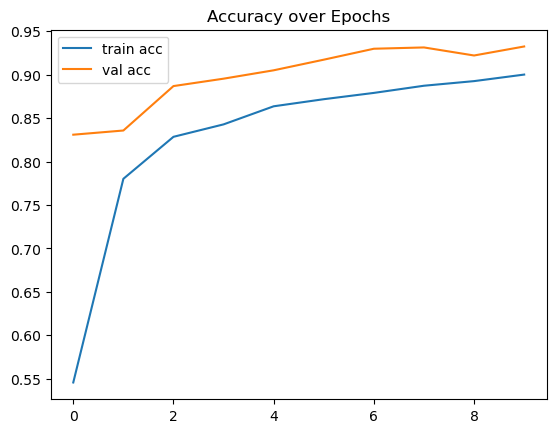

In [11]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


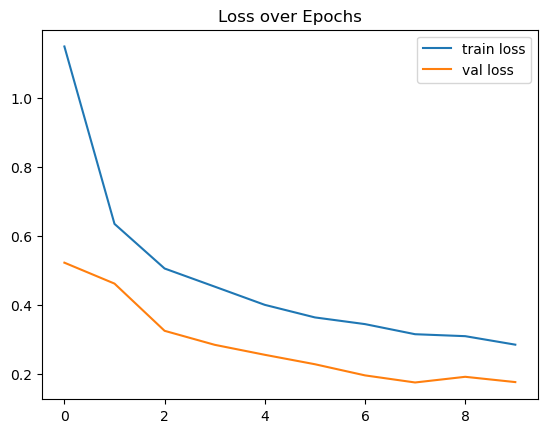

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Saving the Model

We’ll save the trained model as **fruit_cnn_model.h5**.  


In [13]:
model.save("fruit_cnn_model.h5")

# Loading Model for Prediction

We reload the model and create a **label mapping**.  


In [14]:
loaded_model = tf.keras.models.load_model("fruit_cnn_model.h5")
labels = {v: k for k, v in train_data.class_indices.items()}
print("Class Labels:", labels)

Class Labels: {0: 'freshapples', 1: 'freshbanana', 2: 'freshoranges', 3: 'rottenapples', 4: 'rottenbanana', 5: 'rottenoranges'}


# Prediction Function

- Resize uploaded image to **150x150**.  
- Normalize pixel values.  
- Predict class with highest probability.  


In [15]:
def predict_image(img):
    img = tf.image.resize(img, img_size) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = loaded_model.predict(img)[0]
    class_id = np.argmax(prediction)
    return {labels[class_id]: float(prediction[class_id])}


# Frontend with Gradio

We’ll use **Gradio** to create a simple interface:  
- Upload fruit image  
- Model predicts fresh/rotten type  


## Run Inside Jupyter Notebook

If you are using Jupyter Notebook / JupyterLab, you don’t need a .py file.
Just run:
```python
interface.launch()
```
> By default, it will open a new tab in your browser at a local URL (like http://127.0.0.1:7860).

You can upload an image directly there.

In [16]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Label(num_top_classes=3),
    title="🍎🍌🍊 Fresh vs Rotten Fruit Classifier",
    description="Upload an image of apple, banana, or orange and find out if it’s fresh or rotten!"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


## Run as a Python Script (app.py)

If you want to run it like a web app, create a new file app.py and copy everything (model loading + predict function + Gradio interface).
```python
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TF warnings

import tensorflow as tf
import numpy as np
import gradio as gr
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ================================
# 📌 Dummy Model Definition (Moved to top-level for scope)
# ================================
class DummyModel:
    def predict(self, img):
        logging.info("Using DummyModel for prediction.")
        # Simulate a prediction (ensure it's a 1D array of probabilities)
        # Example distribution for 6 classes
        probs = np.random.rand(6)
        return np.array([probs / probs.sum()]) # Normalize to sum to 1

# ================================
# 📌 Load Trained Model
# ================================
loaded_model = None # Initialize to None
try:
    loaded_model = tf.keras.models.load_model("fruit_cnn_model.h5")
    logging.info("Successfully loaded fruit_cnn_model.h5")
except Exception as e:
    logging.error(f"Error loading model: {e}. Falling back to DummyModel.")
    loaded_model = DummyModel() # Assign the dummy model if real model fails

# Class labels (without emojis)
labels = {
    0: "Fresh Apple",
    1: "Fresh Banana",
    2: "Fresh Orange",
    3: "Rotten Apple",
    4: "Rotten Banana",
    5: "Rotten Orange"
}

img_size = (150, 150)

# ================================
# 📌 Prediction Function
# ================================
def predict_image(img):
    logging.info(f"predict_image called with img type: {type(img)}")
    if img is None:
        logging.warning("No image provided to predict_image function.")
        return "<div class='result-box'>Please upload an image or use the webcam.</div>"

    try:
        # Ensure img is a numpy array.
        if not isinstance(img, np.ndarray):
            logging.error(f"Input image is not a numpy array. Type: {type(img)}")
            # Attempt conversion if it's a PIL Image or similar
            if hasattr(img, 'convert'): # Check if it's a PIL Image
                img = np.array(img.convert("RGB"))
            else:
                raise ValueError("Image input is not a numpy array or a recognizable image object.")


        # Check image shape and convert if necessary
        if img.ndim == 2: # Grayscale image
            img = np.stack([img, img, img], axis=-1) # Convert to 3 channel RGB
            logging.info("Converted 2D grayscale image to 3D RGB.")
        elif img.ndim == 3 and img.shape[-1] == 4: # RGBA image (often from webcam)
            img = img[:, :, :3] # Take only RGB channels
            logging.info("Converted 4-channel RGBA image to 3-channel RGB.")
        elif img.ndim == 3 and img.shape[-1] == 3: # Already RGB
            logging.info("Image is already 3-channel RGB.")
        else:
            raise ValueError(f"Unexpected image dimensions or channels: {img.shape}")

        # Now, ensure loaded_model is not None before proceeding.
        # This check is technically redundant if `loaded_model` is always assigned
        # either a real model or DummyModel, but good for clarity.
        if loaded_model is None:
             raise RuntimeError("Model was not loaded successfully and dummy model was not assigned.")


        if isinstance(loaded_model, DummyModel):
            prediction_array = loaded_model.predict(img)[0]
            logging.info("Dummy model predicted.")
        else:
            # Preprocessing for actual model
            img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
            img_tensor = tf.image.resize(img_tensor, img_size)
            img_tensor = img_tensor / 255.0 # Normalize
            img_tensor = np.expand_dims(img_tensor, axis=0) # Add batch dimension
            prediction_array = loaded_model.predict(img_tensor)[0]
            logging.info("Actual model predicted.")

        class_id = np.argmax(prediction_array)
        predicted_label = labels[class_id]
        confidence = float(prediction_array[class_id]) * 100 # Convert to percentage

        status_color = "#28a745" if "Fresh" in predicted_label else "#dc3545" # Green for Fresh, Red for Rotten
        
        html_output = f"""
        <div class='result-box' style='border-left: 8px solid {status_color};'>
            <div class='result-label'>{predicted_label}</div>
            <div class='result-confidence' style='color: {status_color};'>{confidence:.2f}% Confidence</div>
            <div class='result-detail'>
                Based on the image, the model predicts this fruit is 
                <span style='font-weight: bold; color: {status_color};'>{predicted_label}</span>.
            </div>
        </div>
        """
        logging.info(f"Prediction successful: {predicted_label} with {confidence:.2f}% confidence.")
        return html_output

    except Exception as e:
        logging.error(f"Error during prediction: {e}", exc_info=True)
        return f"<div class='result-box error-message'>Prediction Error: {e}<br>Please try again or check the image format.</div>"

# ================================
# 📌 Enhanced Gradio UI with Advanced CSS
# ================================
custom_css = 
/* Import Poppins font from Google Fonts */
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;600;700;800&display=swap');

/* General Body and Background */
body {
    font-family: 'Poppins', sans-serif;
    margin: 0;
    padding: 0;
    overflow-x: hidden;
    /* Richer, more complex animated gradient */
    background: linear-gradient(135deg,
                #FFD700 0%,     /* Gold */
                #FFA07A 25%,    /* Light Salmon */
                #FF6347 50%,    /* Tomato */
                #A200FF 75%,    /* Electric Purple */
                #00C9FF 100%    /* Bright Blue */
                );
    background-size: 600% 600%; /* Even larger for more dramatic shift */
    animation: gradientShift 20s ease infinite alternate; /* Slower, alternates direction */
}

@keyframes gradientShift {
    0% { background-position: 0% 50%; }
    100% { background-position: 100% 50%; }
}

/* Main Gradio Container Styling */
.gradio-container {
    max-width: 1100px; /* Slightly wider */
    margin: 50px auto;
    padding: 35px;
    border-radius: 25px; /* More rounded */
    background: rgba(255, 255, 255, 0.98); /* Almost opaque white */
    box-shadow: 0 20px 40px rgba(0, 0, 0, 0.25); /* Deeper, more distinct shadow */
    backdrop-filter: blur(12px); /* Stronger frosted glass */
    border: 1px solid rgba(255, 255, 255, 0.4);
    transition: all 0.5s ease-in-out; /* Smooth transitions for container */
}

.gradio-container:hover {
    box-shadow: 0 25px 50px rgba(0, 0, 0, 0.35); /* Even more lift on hover */
}


/* Headers */
h1 {
    color: #FF6347; /* Tomato Red */
    text-align: center;
    font-size: 3.2em; /* Even larger heading */
    margin-bottom: 0.4em;
    font-weight: 800; /* Extra bold */
    text-shadow: 3px 3px 7px rgba(0,0,0,0.15); /* Stronger text shadow */
    letter-spacing: 1.5px; /* Slightly spaced letters */
}

h2 {
    color: #36454F; /* Charcoal Grey */
    text-align: center;
    font-size: 1.8em;
    margin-top: 0;
    font-weight: 600;
}

/* Markdown for descriptions */
.gr-markdown {
    text-align: center;
    color: #444;
    font-size: 1.15em;
    line-height: 1.7;
    margin-bottom: 2.5em;
    padding: 0 20px; /* Some padding for longer lines */
}

/* Custom styling for specific Gradio components - Buttons */
.gr-button {
    border: none;
    border-radius: 12px; /* More rounded buttons */
    padding: 15px 30px;
    font-size: 1.25em;
    font-weight: 700; /* Bold */
    cursor: pointer;
    transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1); /* Slower, smoother transition */
    text-transform: uppercase; /* Uppercase button text */
    letter-spacing: 0.8px;
    position: relative;
    overflow: hidden; /* For the "light effect" */
}

/* Specific button colors and glows */
.gr-button:nth-child(1) { /* First button (Predict) */
    background-color: #00C9FF; /* Bright Blue */
    color: #fff;
    box-shadow: 0 7px 20px rgba(0, 201, 255, 0.4);
}
.gr-button:nth-child(1):hover {
    background-color: #00B5E0; /* Darker blue */
    box-shadow: 0 10px 25px rgba(0, 201, 255, 0.6);
    transform: translateY(-3px);
}

/* Light effect on button hover */
.gr-button::after {
    content: '';
    position: absolute;
    top: 0;
    left: -100%;
    width: 100%;
    height: 100%;
    background: rgba(255, 255, 255, 0.2);
    transition: all 0.5s ease;
    transform: skewX(-20deg);
}
.gr-button:hover::after {
    left: 100%;
}


/* Styling for Input and Output areas (card-like) */
.gr-image, .gr-html-container { /* Target gr-html-container for the new output */
    background: rgba(255, 255, 255, 0.9);
    border-radius: 18px;
    padding: 25px;
    box-shadow: 0 7px 20px rgba(0, 0, 0, 0.1);
    border: 1px solid rgba(200, 200, 200, 0.6);
    transition: all 0.4s ease;
    min-height: 250px; /* Ensure a good height */
    display: flex;
    flex-direction: column;
    justify-content: center; /* Center content vertically */
    align-items: center; /* Center content horizontally */
}

.gr-image:hover, .gr-html-container:hover {
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.15);
    transform: translateY(-3px);
}

/* Specific input image styling */
.gr-image img {
    border-radius: 15px; /* Slightly more rounded images */
    box-shadow: 0 5px 15px rgba(0,0,0,0.1);
}

/* Custom styling for the HTML prediction output */
.result-box {
    width: 100%;
    padding: 20px 30px;
    border-radius: 15px;
    background: #f9f9f9;
    box-shadow: inset 0 0 15px rgba(0,0,0,0.05); /* Inner shadow */
    text-align: center;
    line-height: 1.5;
    font-size: 1.1em;
    color: #333;
    max-width: 450px; /* Keep it neat */
}

.result-label {
    font-size: 2.2em;
    font-weight: 700;
    margin-bottom: 5px;
    text-transform: capitalize;
}

.result-confidence {
    font-size: 1.6em;
    font-weight: 600;
    margin-bottom: 15px;
}

.result-detail {
    font-size: 0.95em;
    color: #666;
}

.error-message {
    color: #dc3545; /* Red for error messages */
    font-weight: 600;
    border-left: 8px solid #dc3545 !important;
}

/* Gradio labels for input/output components */
.gr-image label, .gr-html-container label {
    font-size: 1.1em;
    font-weight: 600;
    color: #444;
    margin-bottom: 10px;
}


/* Footer (keeping it hidden) */
footer {
    visibility: hidden !important;
    height: 0 !important;
}

/* Responsive adjustments */
@media (max-width: 900px) {
    .gradio-container {
        margin: 20px;
        padding: 25px;
    }
    h1 {
        font-size: 2.5em;
    }
    .gr-markdown {
        font-size: 1em;
    }
    .gr-button {
        font-size: 1.1em;
        padding: 12px 25px;
    }
    .result-label {
        font-size: 1.8em;
    }
    .result-confidence {
        font-size: 1.3em;
    }
}

@media (max-width: 600px) {
    .gradio-container {
        margin: 15px;
        padding: 15px;
    }
    h1 {
        font-size: 2em;
    }
    .gr-button {
        font-size: 1em;
        padding: 10px 20px;
    }
    .gr-row { /* Stacks columns on small screens */
        flex-direction: column;
    }
    .gr-image, .gr-html-container {
        margin-bottom: 20px; /* Space between stacked elements */
    }
}


with gr.Blocks(css=custom_css) as demo:

    gr.Markdown("""
    # Fresh vs Rotten Fruit Classifier  
    **Upload an image or use your webcam to check if a fruit is Fresh or Rotten.**  
    Built with **Convolutional Neural Networks (CNN)** | TensorFlow | Keras | Gradio  
    """)

    with gr.Row():
        with gr.Column(scale=1):
            input_img = gr.Image(
                type="numpy",
                label="Upload or Capture Fruit Image",
                sources=["upload", "webcam"],
                image_mode="RGB",
            )
            predict_btn = gr.Button("Predict Fruit Condition")
        with gr.Column(scale=1):
            output_html = gr.HTML(
                value="<div class='result-box'>Upload an image or use the webcam to see the prediction here!</div>",
                label="Prediction Result"
            )

    gr.Markdown("""
    ---
    ### Project Information  
    **Model:** Convolutional Neural Network (CNN)  
    **Dataset:** Kaggle – Fresh & Rotten Fruits  
    **Features:** Image Upload, Webcam Capture, Real-time Prediction  
    """)

    predict_btn.click(fn=predict_image, inputs=input_img, outputs=output_html)

# ================================
# 📌 Launch App
# ================================
if __name__ == "__main__":
    demo.launch()
```
Then run in terminal (inside your project folder):
```bash
python app.py
```
> This will start a Gradio server at http://127.0.0.1:7860 and open it in your browser.

#  Gradio App Results

Below are some screenshots showing how the **Fresh vs Rotten Fruit Classifier** works in action:


## Output 1 – Gradio App Interface
![Gradio App UI](screenshots/Output1.PNG)



##  Output 2 – Rotten Apple Prediction
![Rotten Apple](screenshots/Output2_rotten_apple.PNG)

---

##  Output 3 – Rotten Orange Prediction
![Rotten Orange](screenshots/Output3_rotten_orange.PNG)

---

## Output 4 – Fresh Apple Prediction
![Fresh Apple](screenshots/Output4_fresh_apple.PNG)



 As we can see, the model is able to **predict fruit freshness vs rottenness** with good confidence for apples, bananas, and oranges.


# Conclusion
This project demonstrates a simple Fresh vs Rotten Fruit Classifier that works for 3 fruits only (Apple, Banana, Orange). While the model provides decent predictions, there are some limitations:

-  It only recognizes three fruits, not a wide variety.

-  The dataset used is relatively small, so the model may not generalize well to unseen data.

-  Deep learning models generally require a lot more data and training time for better accuracy.

 Despite these limitations, this project shows how Computer Vision + Deep Learning can be applied in real-world scenarios like food quality detection. With a larger dataset and more advanced models, the classifier could become much more reliable and accurate.